
Evaluation Metrics:
Accuracy: 96.58536585365853 %
Confusion Matrix:
[[123   4]
 [  3  75]]


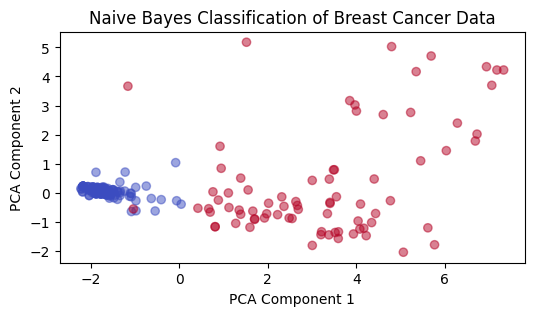

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix

# Load the dataset
cell_df = pd.read_csv('/content/sample_data/cell_samples.csv')

# Data cleaning: Drop rows with missing values in 'BareNuc'
cell_df = cell_df[pd.to_numeric(cell_df['BareNuc'], errors='coerce').notnull()]
cell_df['BareNuc'] = cell_df['BareNuc'].astype(int)

# Feature selection
X = cell_df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]
y = cell_df['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA to reduce to 2D for visualization
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Train the Naive Bayes classifier
model = GaussianNB()
model.fit(X_train_scaled, y_train)

# Predict the labels
y_pred = model.predict(X_test_scaled)

# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the results
print("\nEvaluation Metrics:")
print("Accuracy:", accuracy * 100, "%")
print("Confusion Matrix:")
print(conf_matrix)

# Visualize the classification results
plt.figure(figsize=(6, 3))
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_pred, cmap='coolwarm', alpha=0.5)
plt.title('Naive Bayes Classification of Breast Cancer Data')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()
